In [30]:
# Download all packages 
import pickle
import detritalpy.detritalFuncs as dFunc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
dict_list = ['Fixed 0.15-0.25 AutoML Results.p','Fixed 0.25-0.35 AutoML Results.p','Fixed 0.35-0.45 AutoML Results.p','Fixed 0.45-0.55 AutoML Results.p','Fixed 0.55-0.65 AutoML Results.p','Fixed 0.65-0.75 AutoML Results.p','Fixed 0.75-0.85 AutoML Results.p','Fixed 0.85-0.95 AutoML Results.p', 'Fixed 0.95-0.99 AutoML Results.p',
             'Fixed 0.15-0.25 R2 Results.p','Fixed 0.25-0.35 R2 Results.p','Fixed 0.35-0.45 R2 Results.p','Fixed 0.45-0.55 R2 Results.p','Fixed 0.55-0.65 R2 Results.p','Fixed 0.65-0.75 R2 Results.p','Fixed 0.75-0.85 R2 Results.p','Fixed 0.85-0.95 R2 Results.p', 'Fixed 0.95-0.99 R2 Results.p',
             'Fixed 0.15-0.25 RF Results.p','Fixed 0.25-0.35 RF Results.p','Fixed 0.35-0.45 RF Results.p','Fixed 0.45-0.55 RF Results.p','Fixed 0.55-0.65 RF Results.p','Fixed 0.65-0.75 RF Results.p','Fixed 0.75-0.85 RF Results.p','Fixed 0.85-0.95 RF Results.p','Fixed 0.95-0.99 RF Results.p']

In [32]:
df = pd.DataFrame(columns = ['Designation','Similarity Interval','Number of Grains','Number of Sources','F1 Score'])
dez = []
for entry in dict_list:
    temp_dict = pickle.load(open(entry,'rb'))
    interval = entry[6:15]
    meth = entry[16:18]
    if meth == 'Au':
        meth = 'AutoML'
    if meth == 'RF':
        meth = 'Random Forest'
    designator = str(meth)
    dez.append(designator)
    for key in temp_dict:
        if type(temp_dict[key]) is list:
            num_sources = key[0]
            num_grains = key[1]
            f1_score = temp_dict[key][0]
            df.loc[len(df.index)] = [designator,interval,num_grains,num_sources,f1_score]
        # elif isinstance(temp_dict[key],np.float64) == True:
        #     num_sources = key[0]
        #     num_grains = key[1]
        #     f1_score = temp_dict[key]
        #     df.loc[len(df.index)] = [designator,interval,num_grains,num_sources,f1_score]

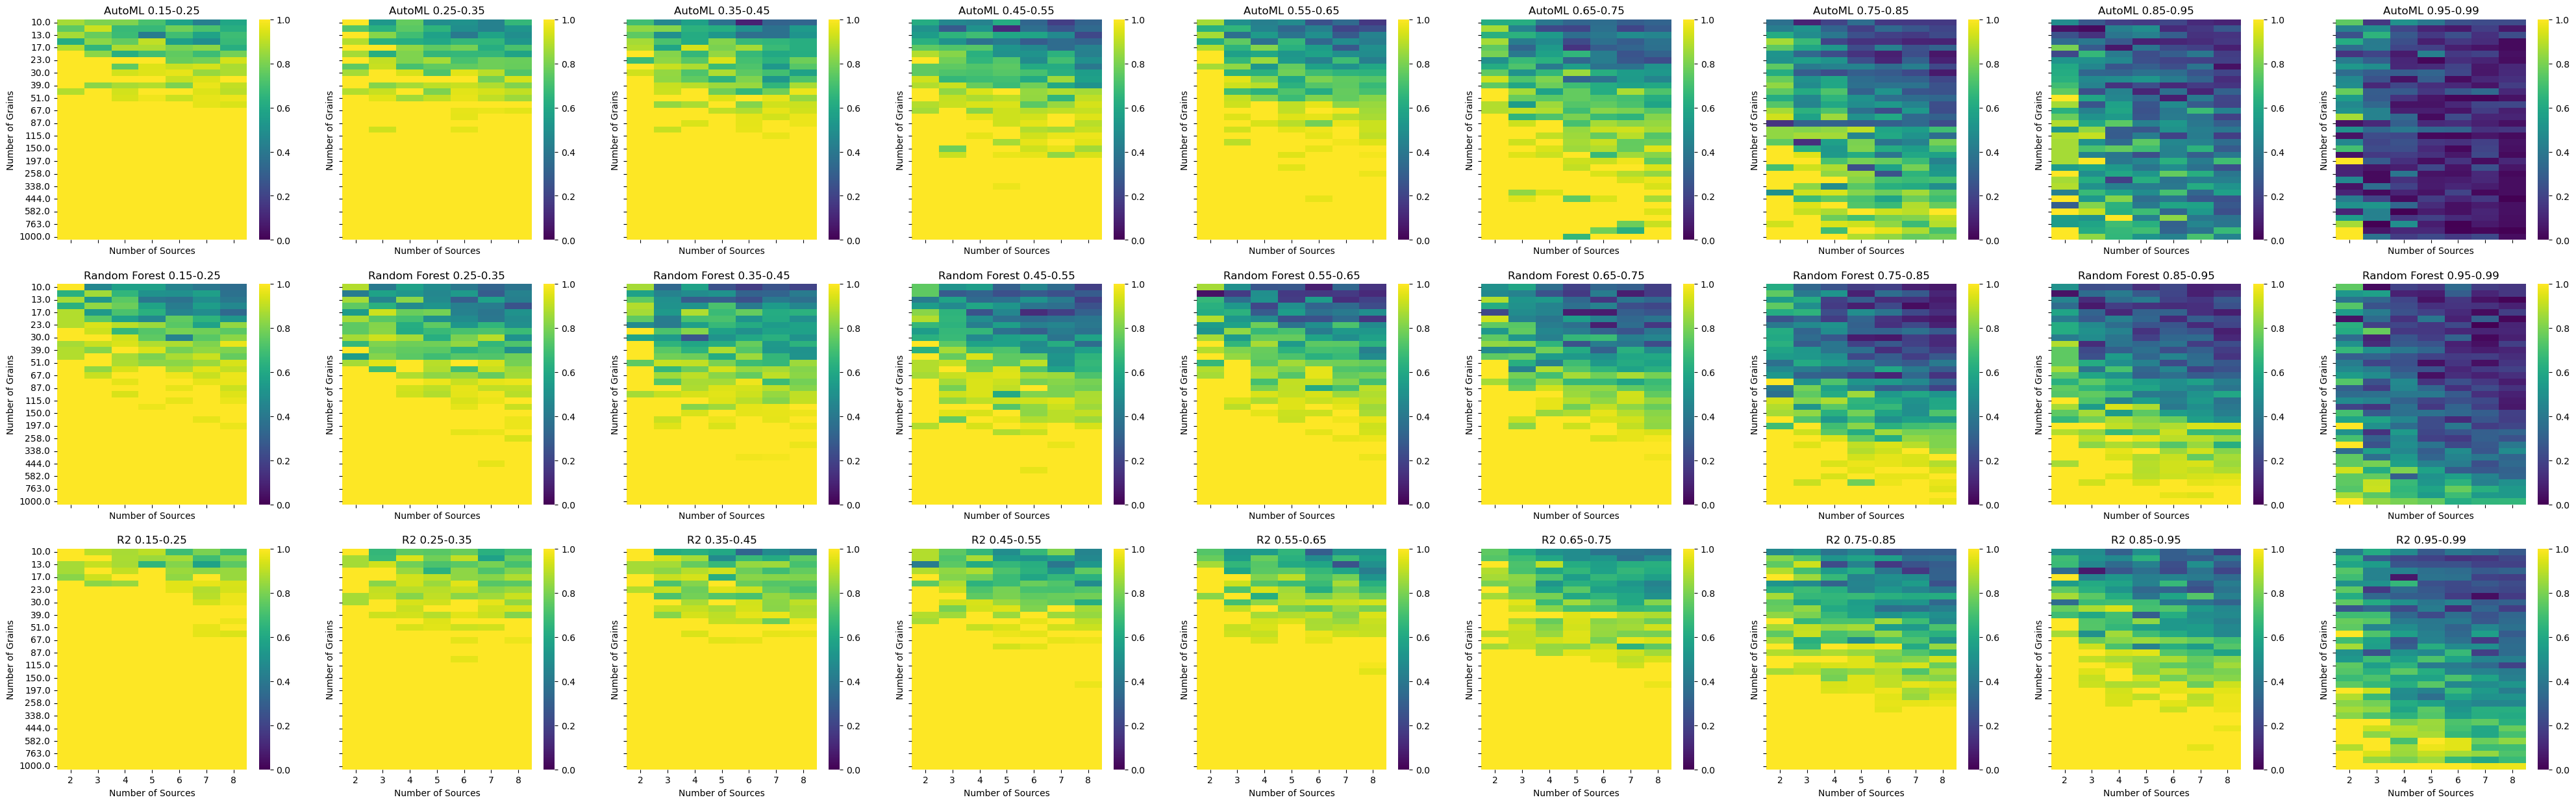

In [35]:
# Plot the heatmaps
fig,ax = plt.subplots(nrows=3,ncols=9,sharex=True,sharey=True,figsize=(50,15))

# Plot each method as a row
grouped = df.groupby('Designation')
methods = ['AutoML','Random Forest','R2']

# Loop through all methods
for j,meth in enumerate(methods):
    meth_group = grouped.get_group(meth)

    # Loop through all similarity intervals
    sim_group = meth_group.groupby('Similarity Interval')
    all_intervals = df['Similarity Interval'].unique()

    # Now loop through the similarity intervals
    for i,interval in enumerate(all_intervals):
        temp_df = sim_group.get_group(interval)
        pivotted = temp_df.pivot(index='Number of Grains', columns='Number of Sources', values='F1 Score')
        title = str(meth) + ' ' + str(interval)
        sns.heatmap(pivotted,cmap='viridis',vmax=1.0,vmin=0,ax=ax[j,i])
        ax[j,i].set_title(title)
plt.savefig('Heatmap Example.jpeg',dpi=300, bbox_inches='tight')